# MICE

This jupyter-notebook shows you how to impute missing values using MICE. IterativeImputer function is used for the implementation.

In [13]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

KERNEL = KNeighborsRegressor(n_neighbors=1)
imp = IterativeImputer(random_state=0, estimator=KERNEL)

# You can have your data split into training and testing
X_training = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]
print("X_training is", X_training)
imp.fit(X_training)

X_testing = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print("before imputation, X_testing is", X_testing)
X_testing_filled = imp.transform(X_testing)
print("after imputation (use training), X_testing is", X_testing_filled)



X_training is [[7, 2, 3], [4, nan, 6], [10, 5, 9]]
before imputation, X_testing is [[nan, 2, 3], [4, nan, 6], [10, nan, 9]]
after imputation (use training), X_testing is [[ 7.  2.  3.]
 [ 4.  2.  6.]
 [10.  5.  9.]]


In [14]:
# Or you can fit and transform based on the same dataset
X_testing_filled = imp.fit_transform(X_testing)
print("after imputation (only use testing), X_testing is", X_testing_filled)

after imputation (only use testing), X_testing is [[ 4.  2.  3.]
 [ 4.  2.  6.]
 [10.  2.  9.]]


## Group Activity 9 Chaning MICE Regression Methods

In this example, let's try different regression methods for MICE and see how it can impact the prediction results. Sample code is based on https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# In this example, we will use housing data. Let's see what it is about
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)
print(california_housing.frame.head())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [20]:
N_SPLITS = 5

rng = np.random.RandomState(0)

# this y is house value
X_full, y_full = fetch_california_housing(return_X_y=True)

# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
X_full = X_full[::10]
y_full = y_full[::10]
n_samples, n_features = X_full.shape


In [21]:

# Estimate the score on the entire dataset, with no missing values
br_estimator = BayesianRidge()
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring="neg_mean_squared_error", cv=N_SPLITS
    ),
    columns=["Full Data"],
)

# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ("mean", "median"):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy), br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
# TODO let's use BayesianRidge, DecisionTreeRegressor with max_features=sqrt
# TODO ExtraTreesRegressor using 10 estimators
# TODO KNN using k=15
estimators = [
    '''TODO'''
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    # TODO in the pipeline we first estimate missing values, then use BayesianRidge
    # to estimate y
    estimator = make_pipeline(
        '''TODO''', '''TODO'''
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=["Original", "SimpleImputer", "IterativeImputer"],
    axis=1,
)



/home/ruiwu1990/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/ruiwu1990/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/ruiwu1990/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/ruiwu1990/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/ruiwu1990/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/ruiwu1990/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: 

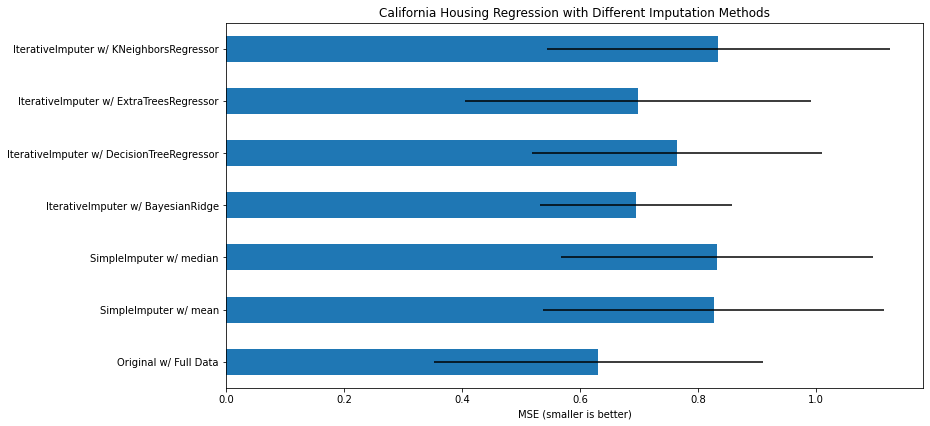

In [22]:
# plot california housing results
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title("California Housing Regression with Different Imputation Methods")
ax.set_xlabel("MSE (smaller is better)")
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()